<a href="https://colab.research.google.com/github/Kuldeep938/se20uari083_ResNet/blob/main/catsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 224, 224


base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 5s 0us/step


In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-10-16 17:42:13--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  19.4MB/s    in 4.2s    

2023-10-16 17:42:17 (15.5 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_datagen = ImageDataGenerator()


test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (img_width, img_height))

validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (img_width, img_height))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:

history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 10,
            validation_steps = 50,
            verbose = 1)

Epoch 1/10
100/100 [==============================] - 12s 117ms/step - loss: 0.0517 - accuracy: 0.9800 - val_loss: 0.0936 - val_accuracy: 0.9730
Epoch 2/10
100/100 [==============================] - 12s 117ms/step - loss: 0.0429 - accuracy: 0.9820 - val_loss: 0.0959 - val_accuracy: 0.9730
Epoch 3/10
100/100 [==============================] - 12s 117ms/step - loss: 0.0112 - accuracy: 0.9955 - val_loss: 0.1038 - val_accuracy: 0.9730
Epoch 4/10
100/100 [==============================] - 11s 115ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0924 - val_accuracy: 0.9740
Epoch 5/10
100/100 [==============================] - 11s 115ms/step - loss: 7.3519e-04 - accuracy: 1.0000 - val_loss: 0.0942 - val_accuracy: 0.9770
Epoch 6/10
100/100 [==============================] - 12s 115ms/step - loss: 4.0183e-04 - accuracy: 1.0000 - val_loss: 0.0959 - val_accuracy: 0.9780
Epoch 7/10
100/100 [==============================] - 13s 130ms/step - loss: 2.7240e-04 - accuracy: 1.0000 - val_loss: 0.0

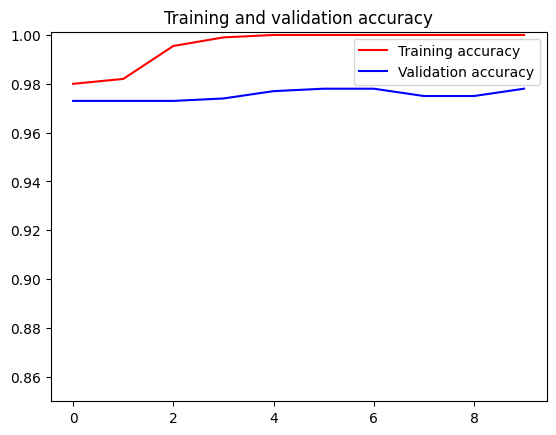

<Figure size 640x480 with 0 Axes>

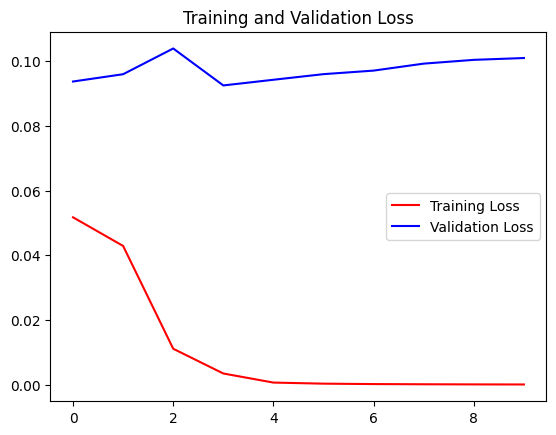

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.ylim(0.85)
plt.legend(loc=0)
plt.figure()


plt.show()


plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')


plt.legend()
plt.show()